**ФАКТОРНЫЙ АНАЛИЗ. МЕТОД МАКСИМАЛЬНОГО ПРАВДОПОДОБИЯ**

Вариант 1

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('LAB_DATA_MSM.csv', index_col='Дата', decimal=',')
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
Дата,,,,,,,,,,,,,,,,,,,,,
20150105,196.75,33.21,935.0,0.06750,133.95,8590,142.0,2295.0,174.70,838,...,1000.5,3.625,385.7,56.37,24.240,455.5,238.00,91.44,0.1055,23.15
20150106,200.30,33.07,926.0,0.06666,138.92,9101,144.6,2345.0,179.90,845,...,1047.0,3.790,397.9,58.28,25.015,476.7,228.75,95.28,0.1195,23.43
20150108,214.95,35.17,956.0,0.06741,146.46,9550,148.1,2572.0,190.05,876,...,1060.0,3.875,403.6,65.70,26.265,483.0,245.00,90.10,0.1230,24.25
20150109,206.60,34.00,938.0,0.06531,141.70,9740,146.6,2461.0,195.00,910,...,1050.0,4.045,406.4,63.10,25.650,475.1,234.05,89.03,0.1195,23.80
20150112,204.00,34.45,935.0,0.06353,140.22,9839,143.1,2477.0,193.00,906,...,1020.0,3.885,411.9,62.90,25.450,470.7,228.25,88.80,0.1155,23.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150827,245.50,38.80,1324.0,0.06985,144.60,10371,145.5,2424.0,227.25,801,...,2280.0,4.950,300.0,73.80,34.150,599.5,306.00,79.29,0.1465,38.67
20150828,246.35,39.04,1357.0,0.06965,146.60,10430,147.6,2520.0,228.90,818,...,2370.0,4.960,302.5,74.82,34.825,613.9,313.00,81.45,0.1475,38.50
20150831,245.10,40.00,1359.0,0.06900,148.19,10569,146.9,2531.0,228.85,814,...,2370.0,4.930,300.5,74.50,34.295,633.0,323.00,81.49,0.1505,39.42


In [175]:
# Номера ценных бумаг, вариант 1
columns = ['2', '5', '6', '13', '14', '16', '17', '20']

# Выберем необходимые ценные бумаги
my_df = df.loc[:, columns]

# Считаем относительные приращения
my_df_rel = my_df.pct_change().iloc[1:, :]

# Переименуем колонки для удобства
columns = ['AFLT', 'GAZP', 'GMNK', 'RBSM', 'RUALR', 'SNGS', 'NVTK', 'ODVA']
my_df_rel.columns = columns
my_df_rel

,AFLT,GAZP,GMNK,RBSM,RUALR,SNGS,NVTK,ODVA
Дата,,,,,,,,
20150106,-0.004216,0.037103,0.059488,0.045517,0.031631,0.031972,0.046542,0.132701
20150108,0.063502,0.054276,0.049335,0.022427,0.014325,0.049970,0.013216,0.029289
20150109,-0.033267,-0.032500,0.019895,0.043871,0.006938,-0.023415,-0.016356,-0.028455
20150112,0.013235,-0.010445,0.010164,-0.039555,0.013533,-0.007797,-0.009261,-0.033473
20150113,0.015965,0.017259,0.018904,-0.015444,0.029376,0.005894,0.039728,-0.034632
...,...,...,...,...,...,...,...,...
20150827,-0.003851,0.029108,0.007872,0.006098,-0.009901,0.031722,0.031487,0.006873
20150828,0.006186,0.013831,0.005689,0.002020,0.008333,0.019766,0.024020,0.006826
20150831,0.024590,0.010846,0.013327,-0.006048,-0.006612,-0.015219,0.031113,0.020339


In [176]:
# В дальнейшем X - выборка относительных приращений интересующих нас компаний
X = deepcopy(my_df_rel)

# Для начала нормируем и центрируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=scaler.get_feature_names_out()).head()

,AFLT,GAZP,GMNK,RBSM,RUALR,SNGS,NVTK,ODVA
0,-0.227777,2.075080,2.632369,1.057350,1.217400,1.228763,2.303634,3.146404
1,2.864298,3.049483,2.172497,0.488447,0.577636,1.973343,0.583213,0.640090
2,-1.554308,-1.874388,0.838977,1.016788,0.304525,-1.062601,-0.943391,-0.759396
3,0.569058,-0.622897,0.398198,-1.038721,0.548367,-0.416488,-0.577128,-0.881000
4,0.693708,0.949043,0.794092,-0.444657,1.134045,0.149916,1.951863,-0.909096


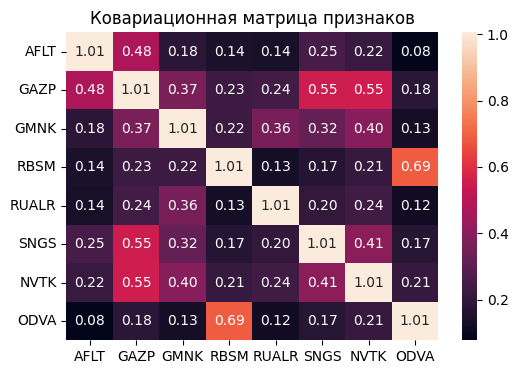

In [177]:
# Найдем ковариационную матрицу
A = np.cov(X, rowvar=False)
plt.figure(figsize=(6, 4))
sns.heatmap(A, annot=True, fmt='.2f', xticklabels=columns, yticklabels=columns)
plt.title('Ковариационная матрица признаков')
plt.show()

## Задание 1

Для относительных приращений, приведенных в варианте задания ценных бумаг (таблица 1), провести канонический факторный анализ методом максимального правдоподобия.

a) Оценить максимально возможное число обобщенных факторов $m_{max}$ модели канонического факторного анализа для заданного числа исходных признаков.

In [178]:
# Число исходных признаков k
k = X.shape[1]

# Число наблюдений n
n = X.shape[0]

print(f'Число исходных признаков k: {k}')
print(f'Число наблюдений n: {n}')

Число исходных признаков k: 8
Число наблюдений n: 165


Максимальное число параметров модели m должно удовлетворять условию: $(k - m)^2 > (k + m)$.

В нашем случае k = 8. Тогда $m_{max} = 4$.

b) Будем строить факторные модели для $m = 1,...,4$, пока не получим значимую факторную модель. Для начала примем m = 1.

c) Используя итерационную процедуру метода максимального правдоподобия найти оценки матрицы факторных нагрузок и дисперсий характерных факторов для факторной модели.



---


В соответствии с моделью факторного анализа, использующей метод максимального правдоподобия, нахождение оценок матрицы факторных нагрузок и дисперсионной матрицы характерных факторов сводится к итерационному решению следующей системы:

$$ \begin{cases}
\alpha = (A - \Sigma) \Sigma^{-1} \alpha \\
A = \alpha \alpha^{T} + \Sigma
\end{cases} $$

Алгоритм:

1) Задается начальное приближение $Σ_0$ для $\Sigma$.
$$
ν_{i0} = (1 - |r_i|)D(\xi_i), \quad |r_i| = max(ρ(\xi_i, \xi_j)), \quad i = 1,...,k, \quad j = 1,...,k, \quad i \neq j
$$

2) Находятся собственные векторы матрицы $(\bar A - Σ_0)Σ_0^{-1}$ упорядоченные по убыванию и нормируются в соответствии с условием:
$$
\vec{α}^{(j) T} Σ^{-1} \vec{α}^{(j)} = λ_j
$$

3) Находится приближение $\Sigma_1$ из условия: $diag(Σ_1) = diag(\bar A - \alpha \alpha^{T})$

4) Повторяются шаги 2-3 до выполнения условия сходимости:
$$
||\Sigma_{s+1} - \Sigma_{s}|| < ϵ
$$
$$
||\Sigma_{s+1} - \Sigma_{s}|| = |Tr(Σ_{s+1}) - Tr(\Sigma_{s})|
$$


---

Нормирование собственных векторов

Если $v_j$ - ненормированный собственный вектор, то:

$$ \alpha_j = c_j \cdot v_j $$

где $c_j$ - нормировочный коэффициент.

Подставляем:

$$ (c_j v_j)^{T} \Sigma^{-1} (c_j v_j) = \lambda_j $$

$$ c_j^2 \cdot v_j^{T} \Sigma^{-1} v_j = \lambda_j $$

$$ c_j = \sqrt{\frac{\lambda_j}{v_j^{T} \Sigma^{-1} v_j}} $$

In [179]:
def get_max_likelihood_parameters(X, m, epsilon=1e-4):
  """
  args:
  X - исходная выборка (центрированные и нормированные данные)
  m - число обобщенных факторов
  epsilon - порог сходимости

  returns:
  alpha - матрица факторных нагрузок
  sigma_new - дисперсионная матрица характерных факторов
  """

  # Найдем оценку ковариационной матрицы
  A = np.cov(X, rowvar=False)

  # Находим максимальную корреляцию
  r_i = np.max(A - np.eye(A.shape[0]))

  # Признаки центрированы и нормированы, поэтому дисперсия каждого признака равна 1
  nu_init = (1 - np.abs(r_i)) * 1

  # Инициализация первоначального приближения дисперсионной матрицы характерных факторов
  sigma_new = nu_init * np.eye(A.shape[0])

  # Матрица на предыдущем шаге
  sigma_old = sigma_new + 0.1 * np.eye(sigma_new.shape[0])

  while np.abs(np.trace(sigma_new) - np.trace(sigma_old)) >= epsilon:

    # Находим собственные векторы, собственные значения
    eigh_vals, eigh_vecs = np.linalg.eig((A - sigma_new) @ np.linalg.inv(sigma_new))

    # Нормируем найденные собственные векторы
    for vec_ind in range(len(eigh_vals)):
      norm_coef = np.abs(eigh_vals[vec_ind] / (eigh_vecs[:, vec_ind].T @ np.linalg.inv(sigma_new) @ eigh_vecs[:, vec_ind]))**0.5
      eigh_vecs[:, vec_ind] *= norm_coef

    # Упорядочим собственные векторы и выберем m первых
    eigh_tuples = sorted(zip(eigh_vals, eigh_vecs.T), reverse=True)[:m]
    m_eigh_vecs = np.array([eigh_tuples[i][1] for i in range(len(eigh_tuples))]).T

    # Находим новое приближение для дисперсионной матрицы характерных факторов
    sigma_old, sigma_new = sigma_new, np.diag(np.diag(A - m_eigh_vecs @ m_eigh_vecs.T))
    alpha = m_eigh_vecs

  return alpha, sigma_new

In [180]:
# Пример для m = 1
alpha_m1, sigma_m1  = get_max_likelihood_parameters(X, m=1)

print('Вектор факторных нагрузок: ', np.round(alpha_m1, 3), sep='\n', end='\n\n')
print('Дисперсионная матрица характерных факторов: ', np.round(sigma_m1, 3), sep='\n')

Вектор факторных нагрузок: 
[[0.465]
 [0.815]
 [0.511]
 [0.351]
 [0.35 ]
 [0.632]
 [0.661]
 [0.309]]

Дисперсионная матрица характерных факторов: 
[[0.79  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.343 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.745 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.883 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.883 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.607 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.569 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.911]]


d) Проверить значимость полученной модели. Если гипотеза о значимости факторной модели отвергается, перейти к рассмотрению модели с числом факторов $m+1$ и
повторить пункт c). Процесс завершается, если гипотеза о значимости факторной
модели принимается, либо число факторов $m$ достигло максимально возможного
значения $m_{max}$.

**Гипотеза о значимости факторной модели**

$H_0$: допустимо представление исходных признаков в виде m-факторной модели (матрицы $A$ и ($\alpha \alpha^{T} + \Sigma$) статистически не различаются)

$$ \eta = -(n-1-\frac{1}{6}(2k+5) - \frac{2}{3}m)(ln\frac{|\bar A|}{|\alpha \alpha^{T} + \Sigma|} - Tr(\bar A (α α^{T} + Σ)^{-1})+k) => χ^2$$

$$df = \frac{1}{2}((k-m)^2-(k+m))$$

$\chi^2_{\text{набл.}} \leq \chi^2_{\text{крит.}}$ - принимается $H_0$.

In [181]:
def fm_significance_test(X, alpha_vec, sigma, alpha=0.05):
  """
  args:
  X - выборочная совокупность
  alpha_vec - вектор факторных нагрузок
  sigma - дисперсионная матрица характерных факторов
  alpha - уровень значимости

  returns:
  chi_square - статистика
  chi_crit - квантиль хи-2
  """

  # Число исходных признаков k
  k = X.shape[1]

  # Число наблюдений n
  n = X.shape[0]

  # Число обобщенных факторов m
  m = alpha_vec.shape[1]

  # Найдем оценку ковариационной матрицы
  A = np.cov(X, rowvar=False)

  # Расчет статистики
  coef = n - 1 - 1/6 * (2*k + 5) - 2/3 * m
  ln = np.log(np.linalg.det(A) / np.linalg.det(alpha_vec @ alpha_vec.T + sigma))
  tr = np.trace(A @ np.linalg.inv(alpha_vec @ alpha_vec.T + sigma))
  chi_square = -coef*(ln - tr + k)

  # Расчет квантиля
  df = 1/2 * ((k - m)**2 - (k + m))
  chi_crit = chi2.ppf(1 - alpha, df)

  # Расчет достигнутого уровня значимости
  p_value = chi2.sf(chi_square, df)

  return chi_square, chi_crit, p_value

In [182]:
chi_square_m1, chi_crit_m1, p_value_m1 = fm_significance_test(X, alpha_m1, sigma_m1)

print(f'Значение статистики: {chi_square_m1}')
print(f'Значение квантиля хи-2: {chi_crit_m1}')

if chi_square_m1 < chi_crit_m1:
  print(f'Принимается нулевая гипотеза. Факторная модель значима.')
else:
  print(f'Принимается альтернативная гипотеза. Факторная модель не является значимой.')

Значение статистики: 117.07556763970409
Значение квантиля хи-2: 31.410432844230918
Принимается альтернативная гипотеза. Факторная модель не является значимой.


Очевидно, модель с одним обобщенным фактором статистически не значима. Далее реализуем функцию, которая подбирает значимую модель с минимальным числом обобщенных факторов (или максимальным числом обобщенных факторов, если ни одна из предыдущих моделей не оказалась значимой).

In [183]:
def get_min_factor_model(X, m_max, alpha=0.05):
  """
  args:
  X - исходная выборка (центрированные и нормированные данные)
  m_max - максимальное число обобщенных факторов
  alpha - уровень значимости, на котором проверяется гипотеза о значимости построенной факторной модели

  returns:
  alpha_matrix - матрица факторных нагрузок
  sigma_matrix - дисперсионная матрица характерных факторов
  """

  for m in range(1, m_max+1):

    alpha_matrix, sigma_matrix = get_max_likelihood_parameters(X, m)
    chi_square, chi_crit, p_value = fm_significance_test(X, alpha_matrix, sigma_matrix, alpha=alpha)

    print(f'm = {m}:')

    if chi_square < chi_crit:
      print(f'Принимается нулевая гипотеза. Факторная модель значима при m = {m}.')
      print(f'Достигнутый уровень значимости: {p_value}', end='\n\n')
      return alpha_matrix, sigma_matrix
    else:
      print(f'Принимается альтернативная гипотеза. Факторная модель не является значимой.')
      print(f'Достигнутый уровень значимости: {p_value}', end='\n\n')

  print(f'Модель не является значимой при уровне значимости {alpha}.')
  print(f'Было достигнуто максимальное число обобщенных факторов (m = {m_max})')
  return alpha_matrix, sigma_matrix

In [184]:
alpha_matrix, sigma_matrix = get_min_factor_model(X, m_max = 4, alpha=0.05)

m = 1:
Принимается альтернативная гипотеза. Факторная модель не является значимой.
Достигнутый уровень значимости: 9.897081050838687e-16

m = 2:
Принимается альтернативная гипотеза. Факторная модель не является значимой.
Достигнутый уровень значимости: 0.02655932697548042

m = 3:
Принимается нулевая гипотеза. Факторная модель значима при m = 3.
Достигнутый уровень значимости: 0.8337549479513822



In [185]:
print('Матрица факторных нагрузок: ', np.round(alpha_matrix, 3), sep='\n', end='\n\n')
print('Дисперсионная матрица характерных факторов: ', np.round(sigma_matrix, 3), sep='\n')

Матрица факторных нагрузок: 
[[ 0.465 -0.133  0.046]
 [ 0.937 -0.249  0.085]
 [ 0.45  -0.032 -0.717]
 [ 0.409  0.61  -0.072]
 [ 0.291  0.008 -0.321]
 [ 0.573 -0.075 -0.09 ]
 [ 0.594 -0.036 -0.181]
 [ 0.418  0.855  0.042]]

Дисперсионная матрица характерных факторов: 
[[0.77  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.059 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.288 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.462 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.818 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.664 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.619 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.098]]


## Задание 2

Вне зависимости от того, построена ли значимая модель, или было достигнуто ограничение по числу факторов, для последней построенной модели оценить:
* выделенные факторами дисперсии;
* доли дисперсий исходных признаков, объясняемые каждым обобщенным фактором;
* дисперсии характерных факторов.

Записать разложение для исходных признаков через обобщенные и характерные факторы, а также выражения для обобщенных факторов и найти оценки значений факторов для всех наблюдений. Произвести классификацию (если это возможно)
обобщенных факторов.

**Выделенные факторами дисперсии** (общности, $h_{i}^{2}​$) - доли дисперсии каждого признака, объясненные всеми обобщенными факторами:
$$ h_i^2 = \sum_{j=1}^m \alpha_{ij}^2 $$

**Дисперсия характерного фактора** - это доля дисперсии признака, которая не объяснена обобщенными факторами, а объяснена только характерным фактором:
$$ψ_{i}^{2} = 1 - h_{i}^{2}$$
$$Σ = \mathrm{diag}(ψ_1, ψ_2, ψ_3, ψ_4, ψ_5, ψ_6, ψ_7, ψ_8)$$

In [186]:
m = 3
k = 8

print('====================================================')
for i in range(k):
  for j in range(m):
    print(f'Доля дисперсии {columns[i]}, объясняемая f_{j+1}: {round(alpha_matrix[i, j]**2, 3)}')
  print(f'Выделенная факторами дисперсия признака: {round(np.sum(alpha_matrix[i, :]**2), 3)}')
  print(f'Дисперсия характерного фактора: {round(sigma_matrix[i, i], 3)}')
  print('====================================================')

Доля дисперсии AFLT, объясняемая f_1: 0.216
Доля дисперсии AFLT, объясняемая f_2: 0.018
Доля дисперсии AFLT, объясняемая f_3: 0.002
Выделенная факторами дисперсия признака: 0.236
Дисперсия характерного фактора: 0.77
Доля дисперсии GAZP, объясняемая f_1: 0.878
Доля дисперсии GAZP, объясняемая f_2: 0.062
Доля дисперсии GAZP, объясняемая f_3: 0.007
Выделенная факторами дисперсия признака: 0.947
Дисперсия характерного фактора: 0.059
Доля дисперсии GMNK, объясняемая f_1: 0.203
Доля дисперсии GMNK, объясняемая f_2: 0.001
Доля дисперсии GMNK, объясняемая f_3: 0.514
Выделенная факторами дисперсия признака: 0.718
Дисперсия характерного фактора: 0.288
Доля дисперсии RBSM, объясняемая f_1: 0.167
Доля дисперсии RBSM, объясняемая f_2: 0.372
Доля дисперсии RBSM, объясняемая f_3: 0.005
Выделенная факторами дисперсия признака: 0.544
Дисперсия характерного фактора: 0.462
Доля дисперсии RUALR, объясняемая f_1: 0.085
Доля дисперсии RUALR, объясняемая f_2: 0.0
Доля дисперсии RUALR, объясняемая f_3: 0.103


In [187]:
for i in range(k):
  coefs = alpha_matrix[i, :]
  feat_str = [f'({round(coefs[j], 2)})*f_{j+1}' for j in range(m)] + [f'eps_{i+1}']
  print(f'{columns[i]} = ', end='')
  print(*feat_str, sep=' + ')

AFLT = (0.46)*f_1 + (-0.13)*f_2 + (0.05)*f_3 + eps_1
GAZP = (0.94)*f_1 + (-0.25)*f_2 + (0.08)*f_3 + eps_2
GMNK = (0.45)*f_1 + (-0.03)*f_2 + (-0.72)*f_3 + eps_3
RBSM = (0.41)*f_1 + (0.61)*f_2 + (-0.07)*f_3 + eps_4
RUALR = (0.29)*f_1 + (0.01)*f_2 + (-0.32)*f_3 + eps_5
SNGS = (0.57)*f_1 + (-0.08)*f_2 + (-0.09)*f_3 + eps_6
NVTK = (0.59)*f_1 + (-0.04)*f_2 + (-0.18)*f_3 + eps_7
ODVA = (0.42)*f_1 + (0.86)*f_2 + (0.04)*f_3 + eps_8


Для записи выражений для обобщенных факторов используем метод Томпсона:

$$ \hat f = β^{(j) T} ξ$$

$$ M(f^{(j)} - \hat{f}^{(j)})^2 \to \min $$

Отсюда: $$ \beta^{(j)} = A^{-1}(\xi) M(f^{(j)} \cdot \xi) $$

Переходя к оценкам, получаем:
$$ \hat f^{T} = \xi^T (\alpha \alpha^{T} + \Sigma)^{-1} \alpha$$

In [188]:
transform_matrix = np.linalg.inv(alpha_matrix @ alpha_matrix.T + sigma_matrix) @ alpha_matrix
print(transform_matrix)

[[ 0.02994269 -0.01671516  0.01909068]
 [ 0.78714501 -0.40755806  0.4584573 ]
 [ 0.07760633 -0.01060946 -0.7951759 ]
 [ 0.04392752  0.1278434  -0.05003282]
 [ 0.01769185  0.00091712 -0.12550978]
 [ 0.04288858 -0.01095741 -0.04323537]
 [ 0.04763882 -0.00568759 -0.09342256]
 [ 0.21071431  0.84203775  0.13595463]]


In [189]:
for j in range(m):
  coefs = transform_matrix[:, j]
  feat_str = [f'({round(coefs[i], 3)})*{columns[i]}' for i in range(k)]
  print(f'f_{j+1} = ', end='')
  print(*feat_str, sep=' + ')

f_1 = (0.03)*AFLT + (0.787)*GAZP + (0.078)*GMNK + (0.044)*RBSM + (0.018)*RUALR + (0.043)*SNGS + (0.048)*NVTK + (0.211)*ODVA
f_2 = (-0.017)*AFLT + (-0.408)*GAZP + (-0.011)*GMNK + (0.128)*RBSM + (0.001)*RUALR + (-0.011)*SNGS + (-0.006)*NVTK + (0.842)*ODVA
f_3 = (0.019)*AFLT + (0.458)*GAZP + (-0.795)*GMNK + (-0.05)*RBSM + (-0.126)*RUALR + (-0.043)*SNGS + (-0.093)*NVTK + (0.136)*ODVA


In [190]:
new_X = pd.DataFrame(X @ transform_matrix, columns=[f'f_{j+1}' for j in range(m)])
new_X

,f_1,f_2,f_3
0,2.724277,1.889280,-1.192476
1,2.933719,-0.736753,-0.424496
2,-1.657324,0.288839,-1.614395
3,-0.709291,-0.626150,-0.656053
4,0.737818,-1.240854,-0.615615
...,...,...,...
160,1.436344,-0.590208,0.358741
161,0.727753,-0.249098,0.026358
162,0.652296,0.065848,-0.158186
163,-1.484793,0.467075,0.404704


**Интерпретация результатов**

In [191]:
# Функция для расчета коэффициента информативности
def calculate_ic(all_factor_loadings, subset_indices):
    """
    args:
    all_factor_loadings - вектор факторных нагрузок
    subset_indices - список индексов признаков, для которых рассчитывается коэффициент информативности

    returns:
    K_u - коэффициент информативности
    """

    K_u = np.sum(all_factor_loadings[subset_indices]**2) / np.sum(all_factor_loadings**2)

    return K_u

In [192]:
# Функция, автоматизирующая отбор признаков с наибольшим коэффициентом информативности
def select_features_ic(all_factor_loadings, threshhold = 0.7):

  features_indeces = [] # Список индексов отобранных признаков
  ic_lst = [] # коэффициенты информативности отобранных признаков

  for i in range(len(all_factor_loadings)):

    # Если превысили заданный порог, прекращаем добавлять новые признаки
    if calculate_ic(all_factor_loadings, features_indeces) >= threshhold:
      return features_indeces, ic_lst

    # Текущий максимальный коэффициент информативности среди неотобранных признаков
    cur_max_ic = 0
    cur_max_ind = 0

    for feature_index in range(len(all_factor_loadings)):

      if (calculate_ic(all_factor_loadings, [feature_index]) > cur_max_ic) and (feature_index not in features_indeces):

        cur_max_ic = calculate_ic(all_factor_loadings, [feature_index])
        cur_max_ind = feature_index

    features_indeces.append(cur_max_ind)
    ic_lst.append(cur_max_ic)

  return features_indeces, ic_lst

In [193]:
# Индексы важных признаков для f1
f1_indeces, f1_ic = select_features_ic(alpha_matrix[:, 0], threshhold=0.63)

# Индексы важных признаков для f2
f2_indeces, f2_ic = select_features_ic(alpha_matrix[:, 1], threshhold=0.63)

# Индексы важных признаков для f3
f3_indeces, f3_ic = select_features_ic(alpha_matrix[:, 2], threshhold=0.63)

In [194]:
def print_importance_list(indeces, features, ic_lst):
  number = 1
  for idx in indeces:
    print(f'{number}: {features[idx]} (K_u = {ic_lst[number - 1]})')
    number += 1

In [195]:
# Наиболее значимые признаки для f_1, отранжированные по коэффициенту информативности
print_importance_list(f1_indeces, columns, f1_ic)

1: GAZP (K_u = 0.36515172541090396)
2: NVTK (K_u = 0.14678164063008295)
3: SNGS (K_u = 0.13672893180332402)


In [196]:
# Наиболее значимые признаки для f_2, отранжированные по коэффициенту информативности
print_importance_list(f2_indeces, columns, f2_ic)

1: ODVA (K_u = 0.614152302760171)
2: RBSM (K_u = 0.312348917299536)


In [197]:
# Наиболее значимые признаки для f_3, отранжированные по коэффициенту информативности
print_importance_list(f3_indeces, columns, f3_ic)

1: GMNK (K_u = 0.7623501962574454)


**Фактор $f_1$:**

1: GAZP - ПАО 'Газпром';

2: NVTK - ПАО 'НОВАТЭК';

3: SNGS - ПАО 'Сургутнефтегаз'.

Обобщенный фактор $f_1$ агрегирует информацию о рынке **нефтедобывающей промышленности**.

**Фактор $f_2$:**

1: ODVA - 'Медиахолдинг';

2: RBSM - 'ПАО РБК'.

Второй фактор агрегирует информацию о рынке **медийных** компаний.

**Фактор $f_3$:**

1: GMNK - ПАО 'ГМК Норильский никель'.

Третий фактор обособленно выделяет **горно-металлургическую** компанию.